In [1]:
import polars as pl

In [2]:
art_df = pl.scan_parquet('laion-art.parquet')
art_df.head()

In [3]:
art_df.head().collect()

URL,TEXT,WIDTH,HEIGHT,similarity,LANGUAGE,hash,pwatermark,punsafe,aesthetic
str,str,i32,i32,f64,str,i64,f32,f32,f32
"""https://www.ad…","""Christmas Shop…",850,850,0.266625,"""nolang""",-3604776403351267688,0.039626,0.000278,8.352225
"""https://img.fr…","""Cremiger hütte…",626,415,0.277981,"""de""",571058205933102479,0.064438,0.001128,8.013723
"""https://zakarp…","""A. Landovska B…",300,344,0.281941,"""sv""",-8455279219565229056,0.023449,0.000022,8.04353
"""https://www.po…","""Рецепт: Воздуш…",330,220,0.260818,"""ru""",-3137830403123787972,0.337415,0.004736,8.149608
"""http://media.i…","""For nearly a d…",320,200,0.377336,"""en""",-7379866731095810216,0.065501,0.014704,9.041004


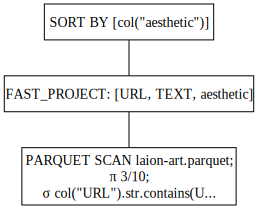

In [4]:
si_q = (art_df
        .filter(pl.col('URL').str.contains('si.edu', literal=True))
        .select(['URL','TEXT','aesthetic'])
        .sort('aesthetic', descending=True))
si_q.show_graph()

In [5]:
si_q.collect()

URL,TEXT,aesthetic
str,str,f32
"""https://americ…","""""Illustration …",9.654829
"""https://womens…","""Woman cutting …",9.387617
"""https://womens…","""Woman cutting …",9.387617
"""https://npg.si…","""Woman in a kit…",9.261763
"""https://npg.si…","""Woman in a kit…",9.261763
"""https://npg.si…","""Woman in a kit…",9.261763
"""https://npg.si…","""Woman in a kit…",9.261763
"""https://www.si…","""Beds (furnitur…",9.214056
"""https://www.si…","""Leah Chase""",9.206856


In [6]:
si_q.collect().head().to_dicts()

[{'URL': 'https://americanhistory.si.edu/sites/default/files/blog_files/a/6a00e553a80e108834019b0149e991970b-320wi.jpg',
  'TEXT': '"Illustration from ""The Taxi That Hurried,"" part of our ""Little Golden Books"" exhibition. Division of Music, Sports, and Entertainment, National Museum of American History."',
  'aesthetic': 9.654829025268555},
 {'URL': 'https://womenshistory.si.edu/sites/default/files/styles/grid_x3/public/https_npg.si_.edu_media_b1000312a.jpg.jpg?itok=AqMXTMv0&c=98908ceda5954d914f342154ee978119',
  'TEXT': 'Woman cutting a yellow squash in a restaurant kitchen. Steam rises from a sink behind her. She wears a baseball cap.',
  'aesthetic': 9.387617111206055},
 {'URL': 'https://womenshistory.si.edu/sites/default/files/styles/grid_x3/public/https_npg.si_.edu_media_b1000312a.jpg.jpg?itok=AqMXTMv0&c=2ff74b278bb44f11562b9da143be54b5',
  'TEXT': 'Woman cutting a yellow squash in a restaurant kitchen. Steam rises from a sink behind her. She wears a baseball cap.',
  'aesthet

In [7]:
si_q.collect().tail().to_dicts()

[{'URL': 'https://anacostia.si.edu/collection/sites/default/files/styles/grid/public/captioned-images/2018_1_3-r2.jpg?itok=Bl93W1Do&c=4efb065ef18341eadc7c90f38ad7abad',
  'TEXT': 'watercolor painting of children playing in neighborhood; chainlink fence in foreground; yellow house is in background',
  'aesthetic': 8.006929397583008},
 {'URL': 'http://ids.si.edu/ids/deliveryService?id=NMAH-JN2018-01489-000001&max=1000',
  'TEXT': "high fashion best place wide varieties Dorothy's Ruby Slippers | National Museum of American History",
  'aesthetic': 8.004568099975586},
 {'URL': 'https://airandspace.si.edu/sites/default/files/styles/callout_tile/public/images/events/3912h_0.jpg?itok=yaEtIJiu',
  'TEXT': 'John Glenn dressed in flight gear, circa 1943',
  'aesthetic': 8.002479553222656},
 {'URL': 'https://airandspace.si.edu/sites/default/files/styles/callout_tile/public/images/events/3912h_0.jpg?itok=e6Sf4w92',
  'TEXT': 'John Glenn dressed in flight gear, circa 1943',
  'aesthetic': 8.0024795